# Validation of SIS model (Numerical vs Analytical)

* This is in reference to Haris et al. (2018)

In [1]:
import numpy as np
from ler.lens_galaxy_population import OpticalDepth
import matplotlib.pyplot as plt
%matplotlib inline 

from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7, Tcmb0=0.0, Neff=3.04, m_nu=None, Ob0=0.0)

Setting multiprocessing start method to 'fork'


* optical_depth_SIS_hemanta is the numerical solution of the SIS model

* I will consider two cases with minimum velocity dispersion vd_min=0 and vd_min=50

* Haris et al. didn't assume any vd_min but Oguri et al. 2018 does (vd_min=50)

In [14]:
od1 = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=10.0,
    lens_type="sis_galaxy",
    optical_depth_function="optical_depth_sis_numerical",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_gengamma",  # zl dependent velocity dispersion
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min = 50., vd_max = 420., alpha = 2.32, beta = 2.67, phistar = 8.0e-3*cosmo.h**3, sigmastar = 161.0),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    create_new_interpolator=dict(optical_depth=dict(create_new=True, resolution=200)),
)


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_gengamma interpolator will be loaded from ./interpolator_json/velocity_dispersion/velocity_dispersion_gengamma_3.pickle
axis_ratio sampler: CPUDispatcher(<function axis_ratio_SIS at 0x33ccef1c0>) has been set.
optical_depth_sis_numerical interpolator will be generated at ./interpolator_json/optical_depth_sis_numerical/optical_depth_sis_numerical_13.pickle
CPUDispatcher(<function axis_ratio_SIS at 0x33ccef1c0>)
Computing optical depth with multiprocessing...


100%|█████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 39.72it/s]


Chosen velocity dispersion sampler: velocity_dispersion_gengamma
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd_max': 420.0, 'alpha': 2.32, 'beta': 2.67, 'phistar': 0.0027439999999999995, 'sigmastar': 161.0}
Chosen optical depth function: CPUDispatcher(<function OpticalDepth.initialize_interpolator_optical_depth_function.<locals>.<lambda> at 0x34376beb0>)
Chosen axis ratio sampler: CPUDispatcher(<function axis_ratio_SIS at 0x33ccef1c0>)
Chosen cosmology: LambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Ode0=0.7, Tcmb0=0.0, Neff=3.04, m_nu=None, Ob0=None)
Chosen lens_type: sis_galaxy


In [11]:
od2 = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=10.0,
    lens_type="sis_galaxy",
    optical_depth_function="optical_depth_sis_numerical",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_bernardi",  # zl dependent velocity dispersion
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    create_new_interpolator=dict(optical_depth=dict(create_new=True, resolution=200)),
)


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_bernardi interpolator will be generated at ./interpolator_json/velocity_dispersion/velocity_dispersion_bernardi_7.pickle
axis_ratio sampler: CPUDispatcher(<function axis_ratio_SIS at 0x33ccef1c0>) has been set.
optical_depth_sis_numerical interpolator will be generated at ./interpolator_json/optical_depth_sis_numerical/optical_depth_sis_numerical_6.pickle
CPUDispatcher(<function axis_ratio_SIS at 0x33ccef1c0>)
Computing optical depth with multiprocessing...


100%|█████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 37.47it/s]


Chosen velocity dispersion sampler: velocity_dispersion_bernardi
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd_max': 420.0, 'alpha': 0.94, 'beta': 1.85, 'phistar': 0.02099, 'sigmastar': 113.78}
Chosen optical depth function: CPUDispatcher(<function OpticalDepth.initialize_interpolator_optical_depth_function.<locals>.<lambda> at 0x343697520>)
Chosen axis ratio sampler: CPUDispatcher(<function axis_ratio_SIS at 0x33ccef1c0>)
Chosen cosmology: LambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Ode0=0.7, Tcmb0=0.0, Neff=3.04, m_nu=None, Ob0=None)
Chosen lens_type: sis_galaxy


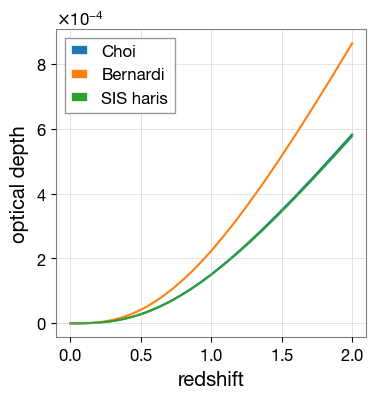

In [15]:
zs = np.geomspace(0.001, 2, 100)
tau_sis1 = od1.strong_lensing_optical_depth(zs)
tau_sis2 = od2.strong_lensing_optical_depth(zs)
tau_sis_haris = od1.optical_depth_sis_analytic(zs)

# plot 
plt.figure(figsize=(4,4))
plt.plot(zs, tau_sis1, label='Choi')
plt.plot(zs, tau_sis2, label='Bernardi')
plt.plot(zs, tau_sis_haris, label='SIS haris')
plt.xlabel('redshift')
plt.ylabel('optical depth')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

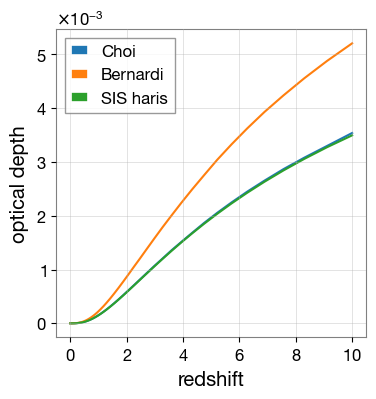

In [16]:
zs = np.geomspace(0.001, 10, 100)
tau_sis1 = od1.strong_lensing_optical_depth(zs)
tau_sis2 = od2.strong_lensing_optical_depth(zs)
tau_sis_haris = od1.optical_depth_sis_analytic(zs)

# plot 
plt.figure(figsize=(4,4))
plt.plot(zs, tau_sis1, label='Choi')
plt.plot(zs, tau_sis2, label='Bernardi')
plt.plot(zs, tau_sis_haris, label='SIS haris')
plt.xlabel('redshift')
plt.ylabel('optical depth')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

* close enough

* Without vd_min constraint, the numerical solution overlaps the analytical solution

* Below $\sigma<2$ velocity dispersion minimum with vd_min=50, is close but not exact.

* Let's try to integrate it

In [15]:
# integration 
from scipy.integrate import quad

z_max = 10
def integrand1(z):
    return od1.strong_lensing_optical_depth(np.array([z]))[0]

tau1, _ = quad(integrand1, 0, z_max)

def integrand2(z):
    return od2.strong_lensing_optical_depth(np.array([z]))[0]

tau2, _ = quad(integrand2, 0, z_max)

def integrand3(z):
    return od1.optical_depth_sis_analytic(np.array([z]))[0]

tau3, _ = quad(integrand3, 0, z_max)

print(tau1, tau2, tau3)

0.018368515181022536 0.019730039480023977 0.018224115533469337


In [16]:
print(f"strong lensing amount difference between numerical and analytical method: {abs(tau2-tau3)/tau3 * 100}%")

strong lensing amount difference between numerical and analytical method: 8.263358206816394%


* 8% difference in the numerical (vd_min=50) and analytical solution

* Reason: More small velocity dispersion, having smaller cross section, included in the analytical solution.

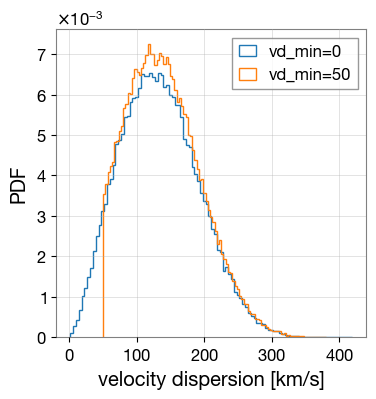

In [7]:
# velocity dispersion distribution PDF
vd1 = od1.sample_velocity_dispersion(100000)
vd2 = od2.sample_velocity_dispersion(100000)

plt.figure(figsize=(4,4))
plt.hist(vd1, bins=100, histtype='step', label='vd_min=0',density=True)
plt.hist(vd2, bins=100, histtype='step', label='vd_min=50',density=True)
plt.xlabel('velocity dispersion [km/s]')
plt.ylabel('PDF')
plt.legend()
plt.grid(alpha=0.5)
plt.show()